# Bell State Circuits

## Some Resources

* <a href=https://www.cs.cmu.edu/~odonnell/quantum15/QuantumComputationScribeNotesByRyanODonnellAndJohnWright.pdf> Notes by Ryan O’Donnell </a>
* <a href=https://medium.com/mdr-inc/checking-the-unitary-matrix-of-the-quantum-circuit-on-qiskit-5968c6019a45 >Checking the unitary matrix on Qiskit</a>
* <a href=https://levelup.gitconnected.com/introduction-to-quantum-computing-using-qiskit-and-ibm-q-a4c4fead6344>Introduction to Quantum Computing using Qiskit and IBM Q
</a>

In [1]:
#!/usr/bin/env python3 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute

from qiskit.visualization import plot_histogram

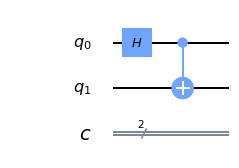

In [2]:
# Define quantum circuit

N_qubits=2; N_bits=2;
bell= QuantumCircuit(N_qubits, N_bits);
bell.h(0)      # Add a hadamard
bell.cx(0, 1)  # add a Cnot gate # similar to Last week's discussion
# Measure the result : Syntax QuantumCircuit.measure(qubit, cbit)
#bell.measure([0,1],[0,1])
#bell.draw()
bell.draw(output='mpl')

* initial state: $\vert 00 \rangle $ 
* After Hadamard Gate: $ \frac{1}{\sqrt{2}} \vert 00 \rangle + \frac{1}{\sqrt{2}} \vert 10 \rangle $ 
* After CNOT Gate: $ \frac{1}{\sqrt{2}} \vert 00 \rangle + \frac{1}{\sqrt{2}} \vert 11 \rangle $

In [3]:
for backend in Aer.backends():
    print(backend.name() )

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [4]:
backend = Aer.get_backend('unitary_simulator')
job_uni = execute(bell, backend)
res_uni = job_uni.result()
print(res_uni.get_unitary(bell, decimals=1))

[[ 0.7+0.j  0.7-0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0.7+0.j -0.7+0.j]
 [ 0. +0.j  0. +0.j  0.7+0.j  0.7-0.j]
 [ 0.7+0.j -0.7+0.j  0. +0.j  0. +0.j]]


In [5]:
bell.measure([0,1],[0,1])
backend = Aer.get_backend('unitary_simulator')
N=2
q=QuantumRegister(N)
c=ClassicalRegister(N)
circ = QuantumCircuit(q,c)
circ.h(q[0])
circ.cx(q[0],q[1])
circ.h(q[1])

job = execute(circ, backend)
result = job.result()
print(result.get_unitary(circ, decimals=1))

[[ 0.5+0.j  0.5-0.j  0.5-0.j  0.5-0.j]
 [ 0.5-0.j -0.5+0.j  0.5+0.j -0.5+0.j]
 [ 0.5+0.j  0.5-0.j -0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5-0.j  0.5+0.j -0.5+0.j]]


In [6]:
sim_qsm = Aer.get_backend('qasm_simulator')
job_qsm = execute(bell, sim_qsm, shots=1024) # shots=1024 (default)
res_qsm = job_qsm.result()
print (res_qsm)

Result(backend_name='qasm_simulator', backend_version='0.4.1', date=datetime.datetime(2020, 3, 30, 21, 32, 57, 190319), header=Obj(backend_name='qasm_simulator', backend_version='0.4.1'), job_id='27deaca1-e743-451b-8147-87d47d865882', metadata={'max_memory_mb': 4096, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0028368670000000003}, qobj_id='5aff5a6e-44fe-4a91-b684-2e5ecc4076a4', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=519, 0x3=505)), header=Obj(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], memory_slots=2, n_qubits=2, name='circuit0', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 4}, seed_simulator=3352193277, shots=1024, status='DONE', success=True, time_taken=0.002709004)], status='COMPLETED', success=True, time_taken=0.013252973556518555)


{'00': 519, '11': 505}


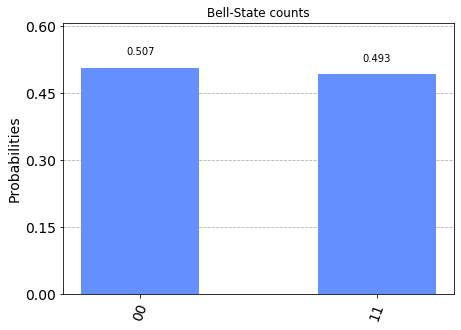

In [7]:

counts_qsm = res_qsm.get_counts(bell)
print (counts_qsm)
plot_histogram( counts_qsm, title='Bell-State counts')

***
***

## Extended Circuits
- initial state = $\vert 00 \rangle $ 
- After application of 1st Hadamard Gate: $ \frac{1}{\sqrt{2}} \vert 00 \rangle + \frac{1}{\sqrt{2}} \vert 10 \rangle $ 
- After application of 1st CNOT Gate: $ \frac{1}{\sqrt{2}} \vert 00 \rangle + \frac{1}{\sqrt{2}} \vert 11 \rangle $ 
- After application of 2nd Hadamard Gate:  $ \frac{1}{2} \vert 00 \rangle + \frac{1}{2} \vert 01 \rangle + \frac{1}{2} \vert 10 \rangle - \frac{1}{2} \vert 11 \rangle $
- After application of 2nd CNOT Gate:  $ \frac{1}{2} \vert 00 \rangle + \frac{1}{2} \vert 01 \rangle - \frac{1}{2} \vert 10 \rangle + \frac{1}{2} \vert 11 \rangle $


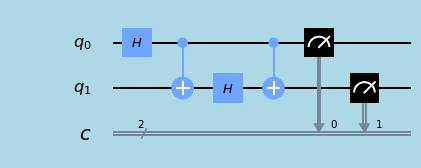

In [8]:
# Define quantum circuit

N_qubits=2; N_bits=2;
ckt2= QuantumCircuit(N_qubits, N_bits);

ckt2.h(0)
ckt2.cx(0, 1)
ckt2.h(1)  # this time on quibit 1
ckt2.cx(0, 1)
ckt2.measure([0,1],[0,1])
#ckt2.draw()
ckt2.draw(output='mpl', style = {'backgroundcolor':'lightblue'})

{'10': 501, '00': 504, '11': 502, '01': 493}


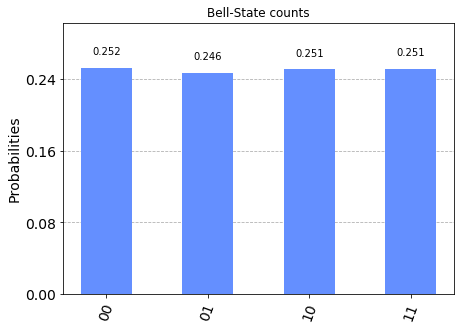

In [9]:
sim_qsm = Aer.get_backend('qasm_simulator')
job_qsm = execute(ckt2, sim_qsm, shots=2000)
res_qsm = job_qsm.result()
counts_qsm = res_qsm.get_counts(ckt2)
print (counts_qsm)
plot_histogram( counts_qsm, title='Bell-State counts')

# Circuit 2

In [10]:
# Define quantum circuit
import pylab as plt

%matplotlib inline

def ckt_(N, init_state, axis):
    q=QuantumRegister(N)
    c=ClassicalRegister(N)
    ckt3= QuantumCircuit(q, c);
    #print (q, c, q[0], c[0], q[1], q[2])

    ckt3.h(q[init_state])
    ckt3.cx(q[0], q[1])
    ckt3.h(q[1])  # this time on quibit 1
    ckt3.cx(q[1], q[2])
    ckt3.h(q[2])
    ckt3.cx(q[0], q[2])
    ckt3.measure(q, c)
    ckt3.draw(output='mpl', ax=axis)
    

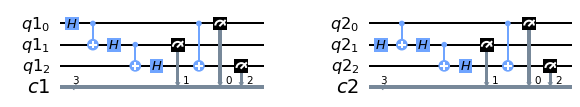

In [11]:
fig, ax = plt.subplots(1, 2) #figsize=(7, 7)
ckt_(3, 0, axis=ax[0])
ckt_(3, 1, axis=ax[1])

- Initial state: |000>
- After Hadamard Gate : $\frac{1}{\sqrt{2}}|000> + \frac{1}{\sqrt{2}}|100> $
- After CNOT Gate : $\frac{1}{\sqrt{2}}|000> + \frac{1}{\sqrt{2}}|110> $
- After Hadamard Gate : $\frac{1}{{2}}|000> + \frac{1}{{2}}|010>  +  \frac{1}{{2}}|100> - \frac{1}{{2}}|110>$
- After CNOT Gate :$\frac{1}{{2}}|000> + \frac{1}{{2}}|011>  +  \frac{1}{{2}}|100> - \frac{1}{{2}}|111>$
- After Hadamard Gate :$\frac{1}{2\sqrt{2}}|000> + \frac{1}{2\sqrt{2}}|001> + \frac{1}{2\sqrt{2}}|010>  - \frac{1}{2\sqrt{2}}|011> +  \frac{1}{2\sqrt{2}}|100> + \frac{1}{2\sqrt{2}}|101>  - \frac{1}{2\sqrt{2}}|110> + \frac{1}{2\sqrt{2}}|111>$


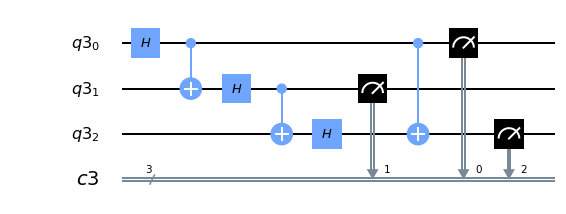

In [12]:
N=3;
q=QuantumRegister(N)
c=ClassicalRegister(N)
ckt3= QuantumCircuit(q, c);

ckt3.h(q[0])
ckt3.cx(q[0], q[1])
ckt3.h(q[1])
ckt3.cx(q[1], q[2])
ckt3.h(q[2])
ckt3.cx(q[0], q[2])
ckt3.measure(q, c)
ckt3.draw(output='mpl')


In [13]:
sim_uni = Aer.get_backend('unitary_simulator')
job_uni = execute(ckt3, sim_uni)
res_uni = job_uni.result()
print (res_uni.get_unitary(ckt3,decimals=1))

AerError: 'Unsupported unitary_simulator instruction measure in circuit circuit9'

{'110': 249, '100': 236, '001': 261, '111': 251, '011': 273, '010': 210, '101': 277, '000': 243} 2000


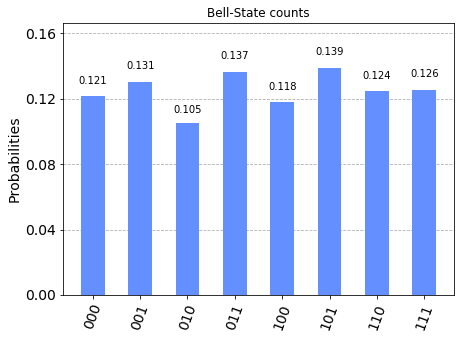

In [14]:
sim_qsm = Aer.get_backend('qasm_simulator')
job_qsm = execute(ckt3, sim_qsm, shots=2000)
res_qsm = job_qsm.result()
counts_qsm = res_qsm.get_counts(ckt3)
print (counts_qsm, sum(counts_qsm.values()))
plot_histogram( counts_qsm, title='Bell-State counts')
#ckt3.to_matrix()

## System with N Qubits

8
Time taken: 0.038461923599243164 sec


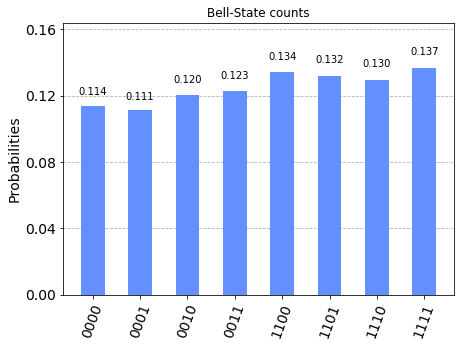

In [15]:
N=4;
q=QuantumRegister(N)
c=ClassicalRegister(N)
circ = QuantumCircuit(q, c);

for i in range(0, N-1):
    circ.h(q[i])
    circ.cx(q[i], q[i+1])

circ.measure(q, c)
sim_qsm = Aer.get_backend('qasm_simulator')
job_qsm = execute(circ, sim_qsm, shots=2000)
res_qsm = job_qsm.result()
counts_qsm = res_qsm.get_counts(circ)
print (len(counts_qsm.values()))
print("Time taken: {} sec".format(res_qsm.time_taken))
%matplotlib inline
plot_histogram( counts_qsm, title='Bell-State counts')

In [ ]:

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)
qc.h(qr[0])
qc.cx(qr[0],qr[1])

measure_Z = QuantumCircuit(qr,cr)
measure_Z.measure(qr,cr)

measure_X = QuantumCircuit(qr,cr)
measure_X.h(qr)
measure_X.measure(qr,cr)

test_Z = qc + measure_Z
test_X = qc + measure_X
backend = Aer.get_backend('unitary_simulator')

job = execute([test_Z, test_X], backend= backend, shots=1000)
result = job.result()

#plot_histogram(result.get_counts(test_Z))

#job= execute([test_Z, test_X], backend = backend, shots = 1000)
#result = job.result()

#result.get_counts(test_Z)
#result.get_counts(test_X)
#plot_histogram(result.get_counts(test_Z))